In [1]:
import pandas as pd 
import seaborn as sns
import gitconfig
import dataClean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import balanced_accuracy_score

## Data preprocessing:


In [2]:
env_path = gitconfig.env_path
env_path
data_df = pd.read_csv(f'{env_path}/amazon.csv')
data_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Replace special characters and columns with number values to numbers

In [3]:
#gather all the columns that need to be converted
cols = ['discounted_price','actual_price','rating','discount_percentage','rating_count'] 

for col in cols:
    #remove the '₹' character from the pricing columns
    data_df[col] = data_df[col].str.replace('[₹]', '', regex=True)
    #remove the '%' character from the discount percentage column
    data_df[col] = data_df[col].str.replace('[%]', '', regex=True)
    #remove the ',' character from the discount percentage column
    data_df[col] = data_df[col].str.replace('[,]', '', regex=True)
    #convert the columns to numerics
    data_df[col] = pd.to_numeric(data_df[col],errors='coerce')

data_df_clean = data_df.dropna().copy()


### We decided the non numeric column data were not necessasy for our model prediction.

In [4]:
cleaned_df = data_df[cols]

cleaned_df = cleaned_df.dropna().copy()

cleaned_df

,discounted_price,actual_price,rating,discount_percentage,rating_count
0,399.0,1099.0,4.2,64,24269.0
1,199.0,349.0,4.0,43,43994.0
2,199.0,1899.0,3.9,90,7928.0
3,329.0,699.0,4.2,53,94363.0
4,154.0,399.0,4.2,61,16905.0
...,...,...,...,...,...
1460,379.0,919.0,4.0,59,1090.0
1461,2280.0,3045.0,4.1,25,4118.0
1462,2219.0,3080.0,3.6,28,468.0
1463,1399.0,1890.0,4.0,26,8031.0


# Data Modeling 

### Setup our X and y variables
Split the data into training and testing sets

In [5]:
y = cleaned_df['rating']
X = cleaned_df.drop(columns='rating')

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=13)


### Train the models

In [6]:
#create and train a linear regression model
model = LinearRegression()

#fit the first model to the full training data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [8]:
#calculate the mean_squared_error and r-squared value
# for testing data
predicted = model.predict(X_test)

#score the predictions with mse and r2
score = round(model.score(X_test,y_test, sample_weight=None),5)
mse = round(mean_squared_error(y_test,predicted),5)
r2 = round(r2_score(y_test,predicted),5)

print(f"-------------------------")
print(f"Score is: {score}")
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

-------------------------
Score is: 0.07188
mean squared error (MSE): 0.0792
R-squared (R2): 0.07188


<Axes: xlabel='rating_count', ylabel='rating'>

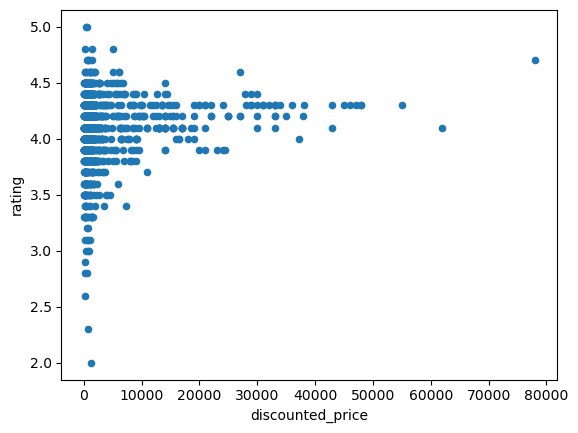

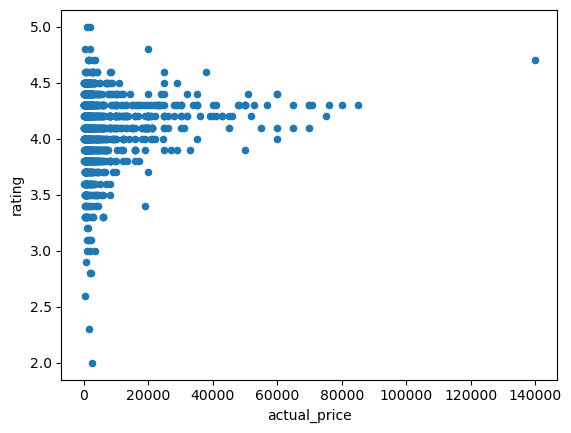

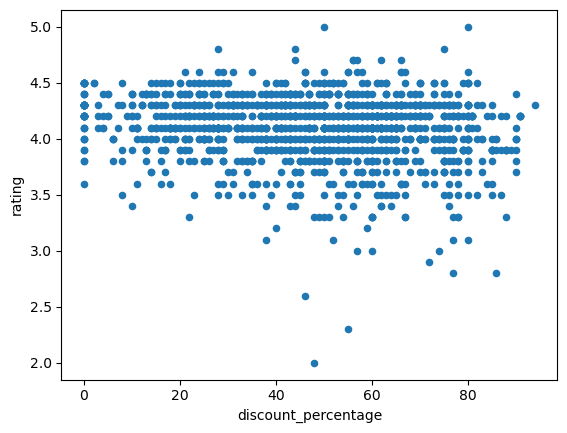

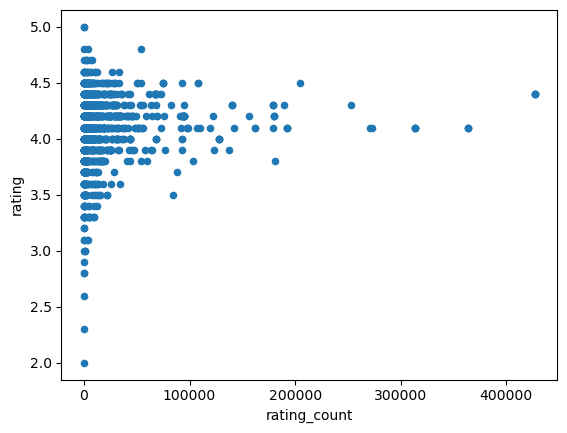

In [15]:
cleaned_df.plot.scatter(x='discounted_price', y= 'rating')
cleaned_df.plot.scatter(x='actual_price', y= 'rating')
cleaned_df.plot.scatter(x='discount_percentage', y= 'rating')
cleaned_df.plot.scatter(x='rating_count', y= 'rating')

	


#### Based on the Visualizations Discount percentage would not be a value to use to predict Thus will remove it from the data values. 

In [26]:
X2 = cleaned_df.drop(columns=['discount_percentage','rating'])
y2 = cleaned_df['rating']

X2


,discounted_price,actual_price,rating_count
0,399.0,1099.0,24269.0
1,199.0,349.0,43994.0
2,199.0,1899.0,7928.0
3,329.0,699.0,94363.0
4,154.0,399.0,16905.0
...,...,...,...
1460,379.0,919.0,1090.0
1461,2280.0,3045.0,4118.0
1462,2219.0,3080.0,468.0
1463,1399.0,1890.0,8031.0


In [27]:
y2

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1462, dtype: float64

In [28]:
#Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=13)

In [29]:
#create and train a linear regression model
model2 = LinearRegression()

#fit the first model to the full training data
model2.fit(X2_train, y2_train)

LinearRegression()

In [31]:
#calculate the mean_squared_error and r-squared value
# for testing data
predicted2 = model2.predict(X2_test)

#score the predictions with mse and r2
score2 = round(model2.score(X2_test,y2_test, sample_weight=None),5)
mse2 = round(mean_squared_error(y2_test,predicted2),5)
rsq2 = round(r2_score(y2_test,predicted2),5)

print(f"-------------------------")
print(f"Score is: {score}2")
print(f"mean squared error (MSE): {mse2}")
print(f"R-squared (R2): {rsq2}")

-------------------------
Score is: 0.071882
mean squared error (MSE): 0.08248
R-squared (R2): 0.03343
